# White-box Attack on CIFAR10

In [1]:
import sys

import torch
import torch.nn as nn

sys.path.insert(0, '..')
import torchattacks

## Load model and data

In [2]:
sys.path.insert(0, '..')
import robustbench
from robustbench.data import load_cifar10
from robustbench.utils import load_model, clean_accuracy

images, labels = load_cifar10(n_examples=5)
print('[Data loaded]')

device = "cuda"
model = load_model('Standard', norm='Linf').to(device)
acc = clean_accuracy(model, images.to(device), labels.to(device))
print('[Model loaded]')
print('Acc: %2.2f %%'%(acc*100))

Files already downloaded and verified
[Data loaded]
[Model loaded]
Acc: 100.00 %


## Adversarial Attack

In [3]:
from torchattacks import PGD
from utils import imshow, get_pred

In [4]:
atk = PGD(model, eps=8/255, alpha=2/225, steps=10, random_start=True)
print(atk)

PGD(model_name=WideResNet, device=cuda:0, return_type=float, attack_mode=default, targeted=False, normalization_used=False, eps=0.03137254901960784, alpha=0.008888888888888889, steps=10, random_start=True)


In [ ]:
# When normalization used:
# atk.set_normalization_used(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [5]:
adv_images = atk(images, labels)

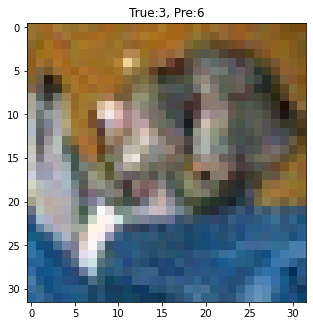

In [6]:
idx = 0
pre = get_pred(model, adv_images[idx:idx+1], device)
imshow(adv_images[idx:idx+1], title="True:%d, Pre:%d"%(labels[idx], pre))